# Variation in the Atomistic Structures of Free-Standing 2D Perovskites Compared to Their Bulk Cubic Counterparts

Upon the formation of free-standing 2D perovskites, their atomistic structures are expected to change significantly due to the removal of long-ranged crystal periodicity as well as the supporting substrates. Because the changes in the bond lengths and bond angles can play a significant role in determining the stability, mechanical  and electronic properties of free-standing 2D perovskites, it is therefore our primary interest to understand how the bond lengths and bond angles have changed compared to the cubic bulk counterparts, upon forming these nanostructures.  

The structural distortions induced in the BX$_6$ coordination environments are particularly interesting, as the electronic structures and the dynamic stabilities of many perovskites are dictated by the orbital hybridizations between the B-site cation and X-site anion. The structural descriptors developed here are chosen to reflect the averaged changes in B-X bond lengths projected parallel ($\Delta S_{\parallel}$) and perpendicular ($\Delta S_{\perp}$) to the slab cleavage plane compared to the bulk value. Mathematically, they are defined as:
\begin{equation}
    \Delta S_{\eta}=\frac{1}{\max\left(\left\|\mathbf{b}_{\eta,\mathbf{v}}^{Pm\bar{3}m}\right\|\right)} \left[ \frac{1}{n_{2D}}\sum_{i=1}^{n_{2D}}\left\|\mathbf{b}_{\eta,\mathbf{v},i}^{2D} \right\|- 
    \frac{1}{n_{Pm\bar{3}m}}\sum_{i=1}^{n_{Pm\bar{3}m}}\left\|\mathbf{b}_{\eta,\mathbf{v},i}^{Pm\bar{3}m} \right\|
    \right] \quad (\eta=\perp\mbox{or}\parallel).
\end{equation}
In the definition, $\mathbf{b}_{\perp,\mathbf{v},i}$ ($\mathbf{b}_{\parallel,\mathbf{v},i}$) represents the projection of $i$-th B-X bond vector (denoted as $\mathbf{B}_{i}$) projected to the norm (in-plane) vector $\mathbf{v}_z$ ($\mathbf{v}_x$ or $\mathbf{v}_y$) to the  cleavage plane (See the diagram below). In the geometrically optimized 2D models, $\mathbf{v}_{z}\equiv \hat{\mathbf{z}}$, thus $\mathbf{b}_{\perp,\mathbf{v}}^{2D}=\mathbf{B}_{i}\cdot\hat{\mathbf{z}}$, whereas in the bulk $Pm\bar{3}m$ crystals, $\mathbf{v}_z$ points to either $[100]$, $[110]$ or $[111]$ depending on the choice of the   cleavage plane. With this, the in-plane projection of the B-X bond can be subsequently calculated as   $\mathbf{b}_{\parallel,\mathbf{v},i}=\mathbf{B}_{i}-\mathbf{b}_{\perp,\mathbf{v},i}$ for both the bulk and the 2D perovskite structures. $n_{2D}$ or $n_{pm\bar{3}m}$ represent total number of B-X bonds in a given structure.   $\max(\|\mathbf{b}_{\parallel,\mathbf{v}}^{Pm\bar{3}m}\|)$ represents the maximum length of the B-X bond that is projected onto  the cleavage plane  in the cubic bulk structures. Both $\Delta S_\parallel$ and $\Delta S_\perp$ equal to zero if the local B-X coordination environments in the 2D slab are exactly the same as those in the bulk perovskite structure. Physically, $\Delta S_\parallel$ and $\Delta S_\perp$ together characterize the extent of anisotropic structural changes in perovskite upon forming a free-standing 2D structure.


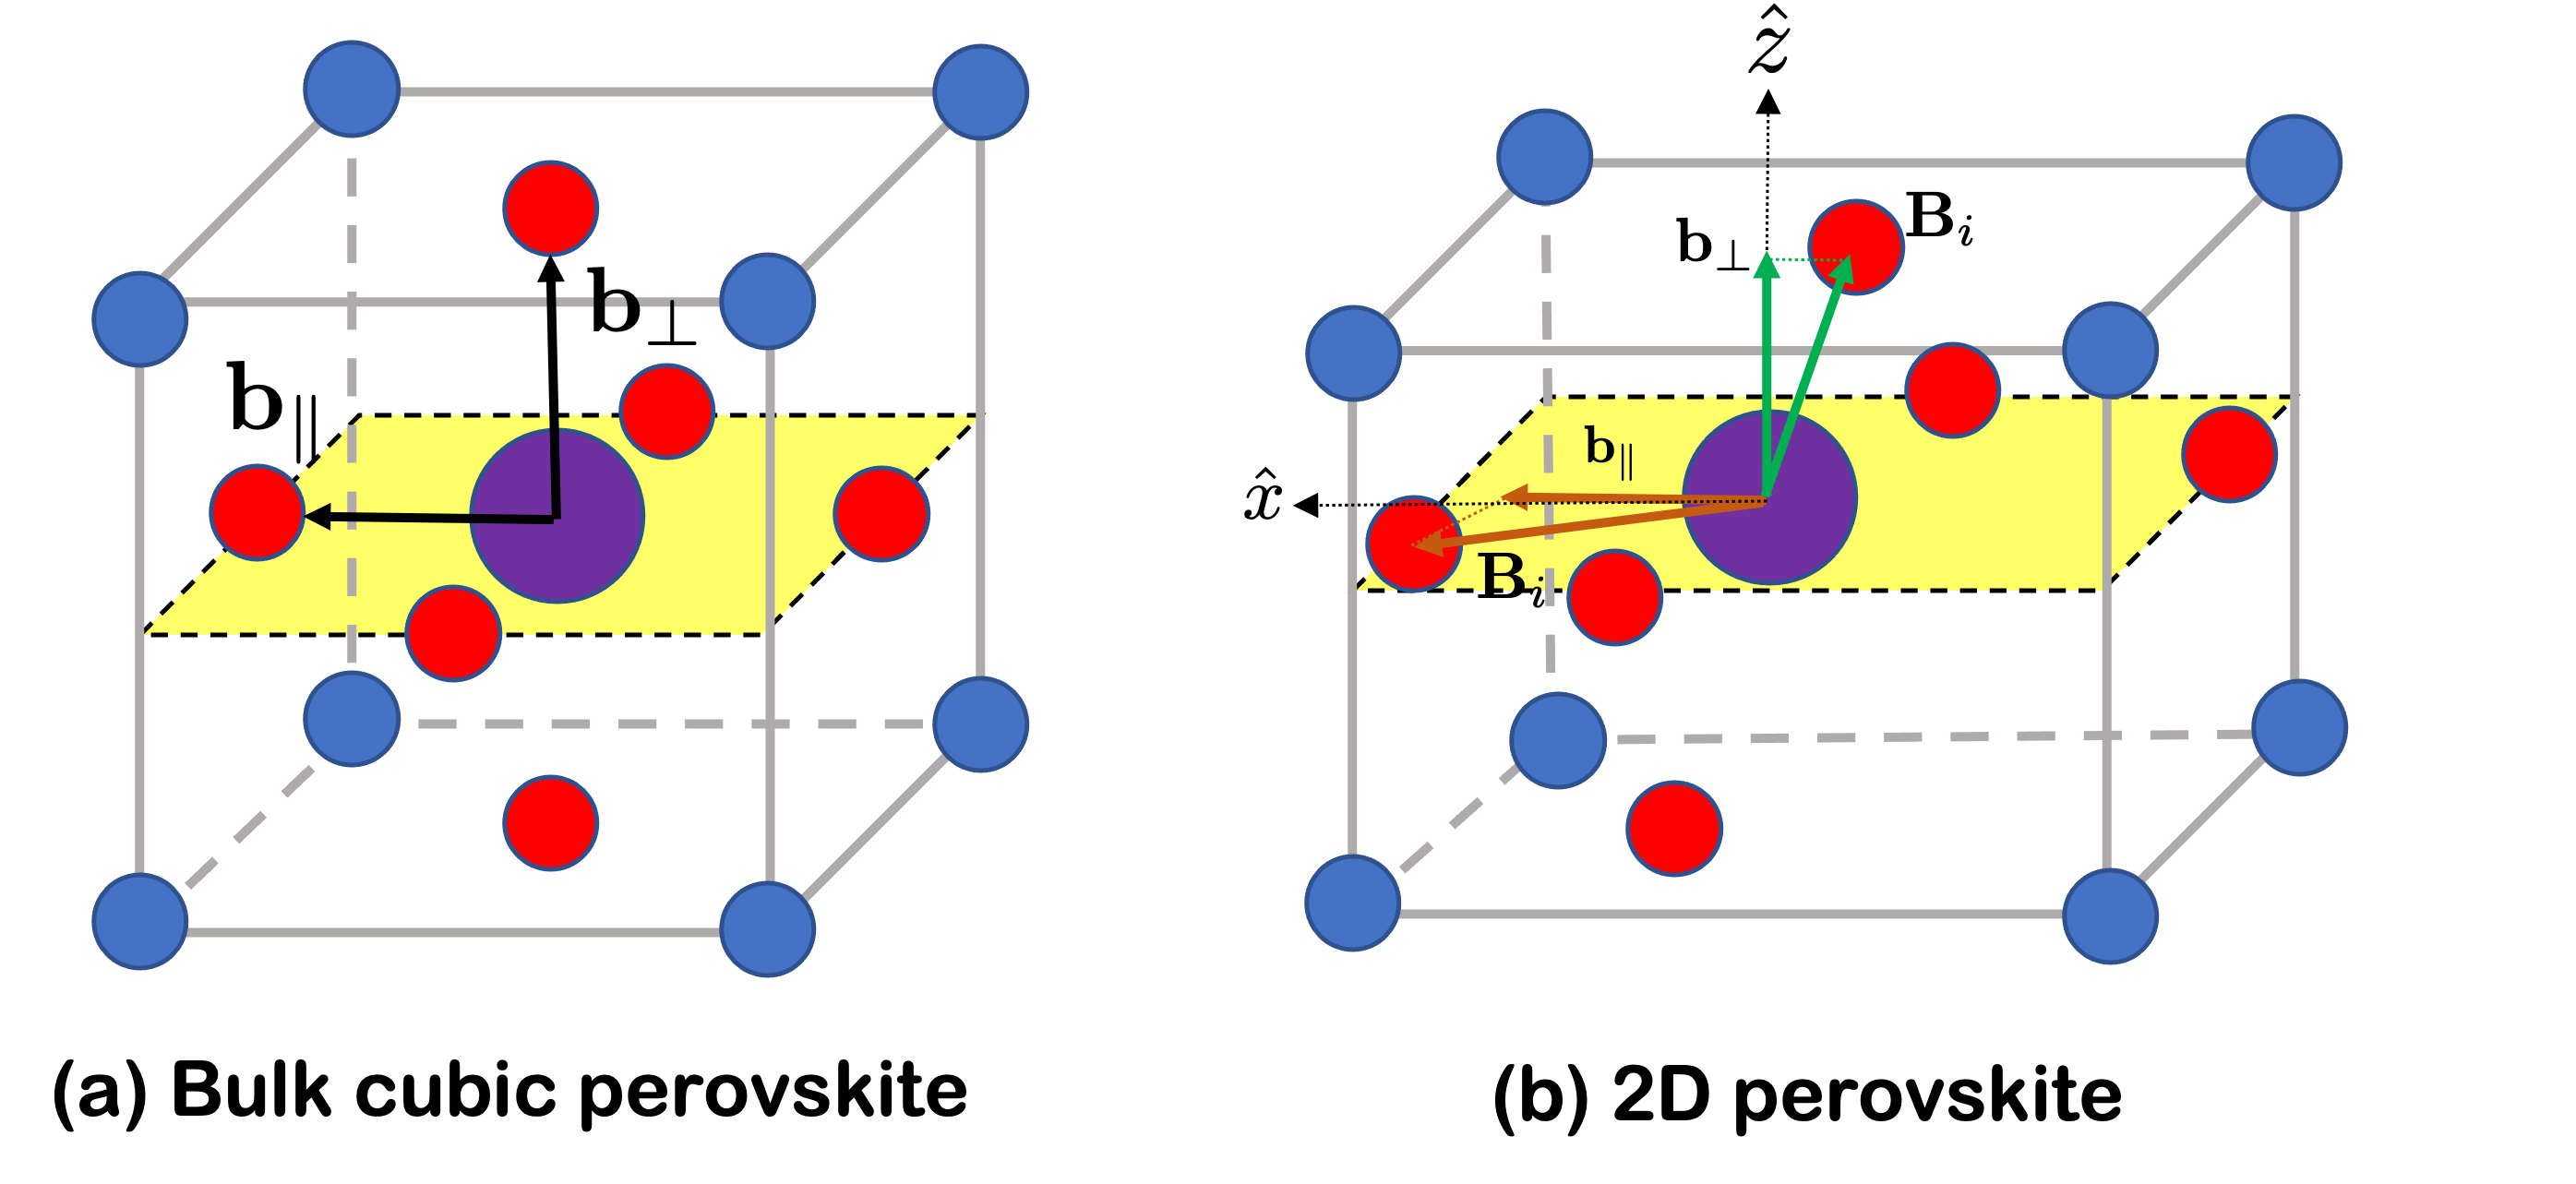

This notebook provides a interactive tools to navigate the landscapes of $\Delta S_{\parallel}$ and $\Delta S_{\perp}$ for free-standing 2D perovskites, that are plotted against the tolerance factors of bulk cubic perovskite counterparts (Fig. 6 in the main manuscript).

In [1]:
try:
    from ase.db import connect
except ImportError:
    !pip install ase
    from ase.db import connect

try:
    import plotly 
except ImportError:
    !pip install plotly
import plotly.graph_objects as go

from utils import *
from element import ionic_radii
import pandas as pd
import numpy as np
import math

In [28]:
#Step I - load all data into a panda dataframe

bulk_db=connect('2dpv_set_bulk.db')
all_data_dict={}
database_counter=0
two_d_out_of_plane_vec=np.array([0.0,0.0,1.0])
for i in range(len(A_site_list)): 
    
    for count_a, a in enumerate(A_site_list[i]):
        for b in B_site_list[i]:
            for c in C_site_list[i]:
                        
                #Get the tolerance factor for the bulk perovskite, this will become the 
                #x-axis for the plot
                tolerance_f = ionic_radii[a][charge_state_A_site[i]] + ionic_radii[c][charge_state_C_site[i]]
                tolerance_f /= ionic_radii[b][charge_state_B_site[i]] + ionic_radii[c][charge_state_C_site[i]]
                tolerance_f /= math.sqrt(2)
                
                #Get the information on the B-X bonds in the bulk perovskites
                bo_vecs_in_pm3m = BO_bond_vectors_in_bulk_perovskite(bulk_db, a, b, c)
                    
                for orientation in ['100', '110', '111']:
                    #projection of bulk B-X vectors onto the desired orientation
                    _or = [float(c) for c in orientation]
                    _or_vec = np.array(_or)
                    _or_vec = _or_vec/np.linalg.norm(_or_vec)
                    
                    bulk_out_comps = [abs(np.dot(bv,_or_vec)) for bv in bo_vecs_in_pm3m]
                    
                    bulk_inplane_comps = [bv - (np.dot(bv,_or_vec)/np.linalg.norm(_or_vec))*_or_vec for bv in bo_vecs_in_pm3m]
                    bulk_inplane_comps = [np.linalg.norm(v) for v in bulk_inplane_comps]
                    bulk_out_comp_max = max(bulk_out_comps)
                    bulk_in_plane_max = max(bulk_inplane_comps)
                    _delta_inplane_bulk = [v / bulk_in_plane_max for v in bulk_inplane_comps]
                    _delta_inplane_bulk = -1.0 * sum(_delta_inplane_bulk) / len(_delta_inplane_bulk)
                    _delta_out_of_plane_bulk = [v / bulk_out_comp_max for v in bulk_out_comps]
                    _delta_out_of_plane_bulk = -1.0 * sum(_delta_out_of_plane_bulk) / len(_delta_out_of_plane_bulk)
                            
                    for term_type in termination_types[orientation]:
                        
                        this_db = connect('2dpv_set_'+orientation+'_'+term_type+'.db')
                        
                        for thick in [9, 5, 7, 3]:  
                            this_data_dict={}
                            two_d_BO_bonds_vec = BO_bond_vectors_in_twod_perovskites(this_db, a, b, c, orientation,
                                                                                         term_type, thick)

                            two_d_out_of_plane_components = [abs(np.dot(v,two_d_out_of_plane_vec)) / bulk_out_comp_max for v in two_d_BO_bonds_vec]
                            
                            two_d_in_plane_components = [v - np.dot(v,two_d_out_of_plane_vec) * two_d_out_of_plane_vec for v in two_d_BO_bonds_vec]
                            two_d_in_plane_components = [np.linalg.norm(v) / bulk_in_plane_max for v in two_d_in_plane_components]

                            _delta_out_of_plane_two_d = sum(two_d_out_of_plane_components) / len(two_d_out_of_plane_components)
                            _delta_inplane_two_d = sum(two_d_in_plane_components) / len(two_d_in_plane_components)

                            _S_out = _delta_out_of_plane_two_d + _delta_out_of_plane_bulk
                            _S_in = _delta_inplane_two_d + _delta_inplane_bulk
                            
                            this_data_dict={'chemical_class':i+1,
                                            'system':a+b+c+'3_'+str(orientation)+"_"+str(term_type)+"_"+str(thick),
                                            'orientation':orientation,
                                            'termination':term_type,
                                            'thickness':thick,
                                            'tolerance_factor':tolerance_f,
                                            'in_plane_variation':_S_in,
                                            'out_of_plane_variation':_S_out}
                            all_data_dict[database_counter]=this_data_dict
                            database_counter+=1
df = pd.DataFrame(all_data_dict).T

In [30]:
chemical_classes = df['chemical_class'].unique().tolist()
crystallographic_orientations = df['orientation'].unique().tolist()
terminations = df['termination'].unique().tolist()
thicknesses = df['thickness'].unique().tolist()
#Step II - dataframe that is grouped by the chemical class, crystallographic orientations, terminations 
#layer thicknesses 
#We want to separate the plots for 2D perovskites with different thicknesess, as there are too many data in
#the plot, and there is not much significant thickness-dependent on the Gamma point phonon frequencies that
#can be observed anyway.
df_categorized = {}
for cc in chemical_classes:
    for cd in crystallographic_orientations:
        for term in terminations:
            for thickness in [3,5,7,9]:
                key = str(cc)+'_'+str(cd)+'_'+str(term)+'_'+str(thickness)
                this_set = df[(df['chemical_class']==cc) & (df['orientation']==cd) & (df['termination']==term) & (df['thickness']==thickness)]
            
                if not this_set.empty:
                    df_categorized[key] = this_set
                this_set=None

## Plot of $\Delta S_{\parallel}$ against the tolerance factor $t$

In [23]:
import copy
sorted_keys = list(sorted(df_categorized.keys()))
fig = go.Figure()

button_list=[]
display_this=[False for _ in sorted_keys]

for i,key in enumerate(sorted_keys):
    fig.add_trace(go.Scatter(x=df_categorized[key]['tolerance_factor'],
                             y=df_categorized[key]['in_plane_variation'],
                             #visible=True,
                             opacity=0.9,
                             marker=dict(size=12,color='#F49F05'),
                             marker_symbol='circle',#name=col,
                             text=df_categorized[key]['system'],
                             name=key
                            )
                 )
    _display_this = copy.deepcopy(display_this)
    _display_this[i] = True
    button_list.append(dict(label = key,
                            method = 'update',
                              args = [{'visible': _display_this},
                                      {'showlegend':False}]))



fig.update_layout(width=900, height=800,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list)])
    
fig.update_xaxes(title_text='$t$')
fig.update_yaxes(title_text='$\Delta S_{\parallel}$')
fig.update_layout(yaxis_range=[-0.6,0.3],xaxis_range=[0.5,1.2])
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)

fig.show()

## Plot of $\Delta S_{\perp}$ against the tolerance factor $t$

In [31]:
import copy
sorted_keys = list(sorted(df_categorized.keys()))
fig = go.Figure()

button_list=[]
display_this=[False for _ in sorted_keys]

for i,key in enumerate(sorted_keys):
    fig.add_trace(go.Scatter(x=df_categorized[key]['tolerance_factor'],
                             y=df_categorized[key]['out_of_plane_variation'],
                             #visible=True,
                             opacity=0.9,
                             marker=dict(size=12,color='#F49F05'),
                             marker_symbol='circle',#name=col,
                             text=df_categorized[key]['system'],
                             name=key
                            )
                 )
    _display_this = copy.deepcopy(display_this)
    _display_this[i] = True
    button_list.append(dict(label = key,
                            method = 'update',
                              args = [{'visible': _display_this},
                                      {'showlegend':False}]))



fig.update_layout(width=900, height=800,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list)])
    
fig.update_xaxes(title_text='$t$')
fig.update_yaxes(title_text='$\Delta S_{\perp}$')
fig.update_layout(yaxis_range=[-1.0,0.6],xaxis_range=[0.5,1.2])
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)

fig.show()